Hipótese Nula - Jogadores com elo mais alto tendem a ter uma média de partidas jogadas maior do que os jogadores de elo mais baixo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Primeiramente preciso criar um dataframe com:

Nome do jogador | ELO (em blitz ou em rapid) | Quantidade de partidas jogadas (2019 e 2020)

In [2]:
#df_matches = pd.read_csv('matches_100000.csv')
df_matches = pd.read_csv('matches.csv')
df_players = pd.read_csv('players.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,3,4,5,6,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_matches.head()

,url,white_username,black_username,end_time,time_control,time_class,rules,rated
0,https://www.chess.com/game/daily/186915562,Iviny,Revenant_1,1550460011,1/1209600,daily,chess,False
1,https://www.chess.com/game/daily/196781256,BetaSource,Iviny,1553458809,1/604800,daily,chess,True
2,https://www.chess.com/game/daily/197826364,abomfim,NJAC,1547827671,1/259200,daily,chess,True
3,https://www.chess.com/game/daily/199402778,tianyuzhe,abcfls,1548151208,1/604800,daily,chess,True
4,https://www.chess.com/game/daily/200930412,abomfim,Tytusik,1546711375,1/259200,daily,chess,True


In [4]:
df_players.head()

,player_id,username,country,followers,last_online,joined,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating
0,5999382,-whitetiger-,IN,4,1611593481,1319353379,False,basic,None,1733,1487,1345
1,113902696,00000000000a5,IN,2,1611550728,1611071564,False,basic,None,1298,0,0
2,106710230,00000000a,IN,5,1611585871,1608800475,False,basic,None,1016,0,0
3,103508064,00000000oooooooo,IN,0,1611590946,1607689710,False,basic,None,988,0,0
4,48828546,000000pankaj,IN,5,1611574958,1534435936,False,basic,None,1171,1454,1041


In [5]:
df_players['match_count'] = 0
df_players.head()

,player_id,username,country,followers,last_online,joined,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating,match_count
0,5999382,-whitetiger-,IN,4,1611593481,1319353379,False,basic,None,1733,1487,1345,0
1,113902696,00000000000a5,IN,2,1611550728,1611071564,False,basic,None,1298,0,0,0
2,106710230,00000000a,IN,5,1611585871,1608800475,False,basic,None,1016,0,0,0
3,103508064,00000000oooooooo,IN,0,1611590946,1607689710,False,basic,None,988,0,0,0
4,48828546,000000pankaj,IN,5,1611574958,1534435936,False,basic,None,1171,1454,1041,0


In [6]:
filtro = df_players['country'] == 'BR'
df_players = df_players[filtro]
df_players.head()

,player_id,username,country,followers,last_online,joined,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating,match_count
669593,5685093,-lh,BR,3,1612241732,1314420617,False,basic,None,1246,1545,0,0
669594,115076418,000000tiago,BR,0,1612207289,1611414297,False,basic,None,1220,0,0,0
669595,78469178,00000al,BR,1,1612232011,1588502506,False,basic,None,0,863,817,0
669596,105481462,00000d,BR,0,1612219048,1608368991,False,basic,None,971,891,915,0
669597,85274162,0002vinicius,BR,0,1612224014,1593628642,False,basic,None,901,537,0,0


In [7]:
n_df_players = df_players.set_index('username')
n_df_players.head()

,player_id,country,followers,last_online,joined,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating,match_count
username,,,,,,,,,,,,
-lh,5685093,BR,3,1612241732,1314420617,False,basic,None,1246,1545,0,0
000000tiago,115076418,BR,0,1612207289,1611414297,False,basic,None,1220,0,0,0
00000al,78469178,BR,1,1612232011,1588502506,False,basic,None,0,863,817,0
00000d,105481462,BR,0,1612219048,1608368991,False,basic,None,971,891,915,0
0002vinicius,85274162,BR,0,1612224014,1593628642,False,basic,None,901,537,0,0


In [8]:
# acessar a conta de partidas de um jogador (posso incrementar por aqui tbm!)
#n_df_players.at['-lh','match_count']

In [9]:
# como checar se um username está minha lista de jogadores
#'-lh' in n_df_players.index

In [10]:
# como checar se um username está na lista de jogadores que a gnt pegou as partidas
#f = open('chosen_players.txt','r')
#lines = f.readlines()
#print('0002vinicius'+'\n' in lines)
#f.close()

In [11]:
# código pra setar quantas partidas cada jogador jogou
# mas só vou registrar as partidas dos jogadores que a gnt pegou as partidas!
f = open('chosen_players.txt','r')
lines = f.readlines()

for i in range(len(df_matches)):
  # descobre quem são os jogadores
  white = df_matches.at[i,'white_username']
  black = df_matches.at[i,'black_username']
    
  if white in n_df_players.index and white+'\n' in lines:
    # caso o jogador das brancas estiver na nossa lista de jogadores
    n_df_players.at[white,'match_count'] += 1
  
  if black in n_df_players.index and black+'\n' in lines:
    # caso o jogador das pretas estiver na nossa lista de jogadores
    n_df_players.at[black,'match_count'] += 1

f.close()

In [12]:
filtro_matchcount = n_df_players['match_count'] != 0
nn_df_players = n_df_players[filtro_matchcount]
nn_df_players.head()

,player_id,country,followers,last_online,joined,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating,match_count
username,,,,,,,,,,,,
00000al,78469178,BR,1,1612232011,1588502506,False,basic,None,0,863,817,1451
0002vinicius,85274162,BR,0,1612224014,1593628642,False,basic,None,901,537,0,50
00093,69940288,BR,2,1612197397,1577473250,False,basic,None,0,0,0,12
0010100ff,102104660,BR,5,1612235831,1607222116,False,premium,None,861,470,549,105
001uc4s,100415146,BR,1,1612247004,1606671791,False,basic,None,469,0,354,108


# TESTE DE PERMUTAÇÃO COM O RATING DO BLITZ

In [31]:
filtro_blitz = nn_df_players['best_blitz_rating'] != 0
df_blitz = nn_df_players[filtro_blitz]
df_blitz.head()

,player_id,country,followers,last_online,joined,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating,match_count
username,,,,,,,,,,,,
00000al,78469178,BR,1,1612232011,1588502506,False,basic,None,0,863,817,1451
0002vinicius,85274162,BR,0,1612224014,1593628642,False,basic,None,901,537,0,50
0010100ff,102104660,BR,5,1612235831,1607222116,False,premium,None,861,470,549,105
0079davi,63076312,BR,7,1612192244,1562551147,False,basic,None,1104,1265,987,473
007contra,107040954,BR,0,1612232393,1608921507,False,basic,None,872,687,0,95


In [32]:
df_blitz.drop(columns=['player_id', 'country', 'followers', 'last_online', 'joined', 'is_streamer', 'status', 'title', 'best_rapid_rating', 'best_bullet_rating'], inplace=True)
df_blitz.head()

/home/isaac/.local/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,best_blitz_rating,match_count
username,,
00000al,863,1451
0002vinicius,537,50
0010100ff,470,105
0079davi,1265,473
007contra,687,95


In [33]:
# achar o rating que vai separar low elo de high elo
porc = 0.75
x = df_blitz['best_blitz_rating'].max() * porc
print(x)

1896.75


In [34]:
# mostra a diferença de quantidade de pessoas high elo pra pessoas low elo
f = df_blitz['best_blitz_rating'] > int(x)
print(f'high elo {len(df_blitz[f])} - low elo {len(df_blitz[~f])}')

high elo 47 - low elo 1448


In [35]:
# vamos observar essa estatística: a diferença na média
stat_obs = df_blitz[f]['match_count'].mean() - df_blitz[~f]['match_count'].mean()
print(f'stat observado {stat_obs}')
print(f'soma de partidas highelo {df_blitz[f]["match_count"].sum()}')
print(f'soma de partidas lowelo {df_blitz[~f]["match_count"].sum()}')
print(f'media de partidas highelo {df_blitz[f]["match_count"].mean()}')
print(f'media de partidas lowelo {df_blitz[~f]["match_count"].mean()}')

stat observado 5271.766030915716
soma de partidas highelo 308674
soma de partidas lowelo 1876269
media de partidas highelo 6567.531914893617
media de partidas lowelo 1295.7658839779006


In [52]:
# calcule a diferença de média para 10000 testes
N = 100000

diff = np.zeros(N)
for i in range(N):
  # bagunce nosso filtro pra permutar quem é highelo e quem é lowelo
  f_t = f
  np.random.shuffle(f_t.values)
  # adicione a nova observação no vetor
  diff[i] = df_blitz[f_t]['match_count'].mean() - df_blitz[~f_t]['match_count'].mean()

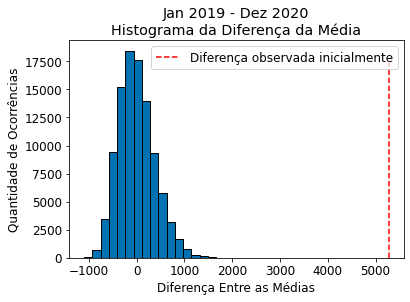

In [75]:
# plote um grafico com o vetor de diferenças
plt.hist(diff, bins=20, edgecolor='k')
plt.xlabel('Diferença Entre as Médias')
plt.ylabel('Quantidade de Ocorrências')
plt.title('Jan 2019 - Dez 2020\nHistograma da Diferença da Média')
plt.vlines(stat_obs,0,17500, color='red', label='Diferença observada inicialmente', linestyles = 'dashed')
plt.legend()
plt.savefig("diff_media.pdf")

In [20]:
# qualquer valor dentro desses extremos seria explicado pela casualidade
print(np.percentile(diff,2.5),np.percentile(diff,97.5))
print(f'stat observado: {stat_obs}')

-629.4348643029269 818.1741892706001
stat observado: 5271.766030915716


CONCLUSÃO: Como a casualidade não pode explicar os nossos dados, então nos resta assumir que não é uma coincidência que jogadores de maior rating jogam mais partidas.

# TESTE DE PERMUTAÇÃO COM O RATING DO RAPID

In [21]:
filtro_rapid = nn_df_players['best_rapid_rating'] != 0
df_rapid = nn_df_players[filtro_rapid]
df_rapid.head()

,player_id,country,followers,last_online,joined,is_streamer,status,title,best_rapid_rating,best_blitz_rating,best_bullet_rating,match_count
username,,,,,,,,,,,,
0002vinicius,85274162,BR,0,1612224014,1593628642,False,basic,None,901,537,0,50
0010100ff,102104660,BR,5,1612235831,1607222116,False,premium,None,861,470,549,105
001uc4s,100415146,BR,1,1612247004,1606671791,False,basic,None,469,0,354,108
001victor,102628520,BR,0,1612210530,1607389017,False,basic,None,907,0,0,118
0079davi,63076312,BR,7,1612192244,1562551147,False,basic,None,1104,1265,987,473


In [22]:
df_rapid.drop(columns=['player_id', 'country', 'followers', 'last_online', 'joined', 'is_streamer', 'status', 'title', 'best_blitz_rating', 'best_bullet_rating'], inplace=True)
df_rapid.head()

/home/isaac/.local/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,best_rapid_rating,match_count
username,,
0002vinicius,901,50
0010100ff,861,105
001uc4s,469,108
001victor,907,118
0079davi,1104,473


In [23]:
# achar o rating que vai separar low elo de high elo
porc = 0.75
x = df_rapid['best_rapid_rating'].max() * porc
print(x)

1736.25


In [24]:
# mostra a diferença de quantidade de pessoas high elo pra pessoas low elo
f = df_rapid['best_rapid_rating'] > int(x)
print(f'high elo {len(df_rapid[f])} - low elo {len(df_rapid[~f])}')

high elo 76 - low elo 1435


In [25]:
# vamos observar essa estatística: a diferença na média
stat_obs = df_rapid[f]['match_count'].mean() - df_rapid[~f]['match_count'].mean()
print(f'stat observado {stat_obs}')
print(f'soma de partidas highelo {df_rapid[f]["match_count"].sum()}')
print(f'soma de partidas lowelo {df_rapid[~f]["match_count"].sum()}')
print(f'media de partidas highelo {df_rapid[f]["match_count"].mean()}')
print(f'media de partidas lowelo {df_rapid[~f]["match_count"].mean()}')

stat observado 2362.668824500275
soma de partidas highelo 259010
soma de partidas lowelo 1500088
media de partidas highelo 3408.0263157894738
media de partidas lowelo 1045.3574912891986


In [26]:
# calcule a diferença de média para 10000 testes
N = 10000

diff = np.zeros(N)
for i in range(N):
  # bagunce nosso filtro pra permutar quem é highelo e quem é lowelo
  f_t = f
  np.random.shuffle(f_t.values)
  # adicione a nova observação no vetor
  diff[i] = df_rapid[f_t]['match_count'].mean() - df_rapid[~f_t]['match_count'].mean()

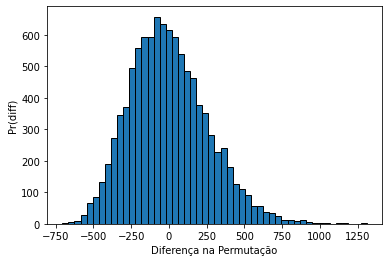

In [27]:
# plote um grafico com o vetor de diferenças
plt.hist(diff, bins=50, edgecolor='k')
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.show()

In [28]:
# qualquer valor dentro desses extremos seria explicado pela casualidade
print(np.percentile(diff,2.5),np.percentile(diff,97.5))
print(f'stat observado: {stat_obs}')

-442.48203190904076 561.7025765633595
stat observado: 2362.668824500275


CONCLUSÃO: Como a casualidade não pode explicar os nossos dados, então nos resta assumir que não é uma coincidência que jogadores de maior rating jogam mais partidas.